# Actividad 1: Procesamiento del Lenguaje Natural

* Actividad realizada por:
    * Jose Manuel Alcaide Carrera.

**Objetivos**

Con esta actividad se tratará de que el equipo consiga aplicar un método basado en modelos ocultos de Markov (HMM) para realizar el etiquetado morfosintáctico de una oración.


**Descripcion:**

En esta actividad debes implementar en Python un etiquetador morfosintáctico basado en modelos ocultos de Markov (HMM) y realizar el etiquetado morfosintáctico de la oración:

*Habla con el enfermo grave de trasplantes.*

Implementando también en Python el algoritmo de Viterbi

## Parte 1: construir el etiquetador morfosintáctico

 * En esta primera parte de la actividad tienes que implementar en Python el etiquetador morfosintáctico basado en un HMM bigrama a partir de un corpus etiquetado, para ello debemos calcular las probabilidades que rigen en este algoritmo, es decir las matrices de probabilidades de transición entre estados y la matriz de emsión, llamada esta última también como matriz de observación. 
 
* Importamos las librerias que necesitamos y descargamos el fichero .txt que vamos a usar como corpus.

In [0]:
import numpy as np
import pandas as pd

In [0]:
source = open("corpus.txt", "r",encoding="utf-8")

In [0]:
corpus = source.readlines()

In [0]:
corpus

['<doc id="27315" title="Tristana" nonfiltered="2700" processed="2679" dbindex="12753">\n',
 '\n',
 'Tristana tristana NP00000 0\n',
 'es ser VSIP3S0 01775973\n',
 'una uno DI0FS0 0\n',
 'película película NCFS000 04960631\n',
 'de de SPS00 0\n',
 'el el DA0MS0 0\n',
 'director director NCMS000 07063762\n',
 'español español AQ0MS0 02727705\n',
 'nacionalizado nacionalizar VMP00SM 00285796\n',
 'mexicano mexicano AQ0MS0 02782661\n',
 'Luis_Buñuel luis_buñuel NP00000 0\n',
 '. . Fp 0\n',
 '\n',
 'Está estar VAIP3S0 01811792\n',
 'basada basar VMP00SF 00430666\n',
 'en en SPS00 0\n',
 'la el DA0FS0 0\n',
 'novela novela NCFS000 04800741\n',
 'de de SPS00 0\n',
 'el el DA0MS0 0\n',
 'mismo mismo AQ0MS0 01990350\n',
 'nombre nombre NCMS000 04778525\n',
 'de de SPS00 0\n',
 'Benito_Pérez_Galdós benito_pérez_galdós NP00000 0\n',
 '. . Fp 0\n',
 '\n',
 'Fue ser VSIS3S0 01775973\n',
 'nominada nominar VMP00SF 01632536\n',
 'a a SPS00 0\n',
 'el el DA0MS0 0\n',
 'Oscar oscar NP00000 0\n',
 'a a

* Observamos que se ha cargado correctamente el corpus. 
* Con esa estructura de datos no podemos realizar nuestra actividad de etiquetado, por eso necesitamos realizar un procesado del mismo que consiste en eliminar la información que nos es util para el etiquetado, como por ejemplo las lineas que comienzan por los simbolos '<' y '\n', para ello creamos una función que recorra todo el texto y que nos devuelva el número de las lineas para mas adelante usarlas para eliminarlas

In [0]:
#Borramos del corpus las líneas que empiezan por < o \n
#Aquí en concreto encontramos los indices
borrar=[]
i=0
for text in corpus:
    if text[0] == '<' or text[0] == '\n' :
        borrar.append(i)
    i=i+1

In [0]:
borrar

[0,
 1,
 14,
 27,
 44,
 45,
 46,
 47,
 48,
 96,
 150,
 151,
 152,
 153,
 154,
 175,
 196,
 197,
 198,
 199,
 200,
 221,
 248,
 335,
 389,
 390,
 391,
 392,
 393,
 415,
 435,
 467,
 495,
 525,
 526]

* Convertimos el corpus en un formatado, dataframe, para poder tratarlo y extraer la información requerida.

In [0]:
corpus_pd = pd.DataFrame(corpus)

* Vemos que estructura tiene

In [0]:
corpus_pd

,0
0,"<doc id=""27315"" title=""Tristana"" nonfiltered=""..."
1,\n
2,Tristana tristana NP00000 0\n
3,es ser VSIP3S0 01775973\n
4,una uno DI0FS0 0\n
...,...
522,los el DA0MP0 0\n
523,síntomas síntoma NCMP000 10266258\n
524,. . Fp 0\n
525,\n


* En este momento es cuando eliminamos las lineas anteriormente mencionadas que empiezan por < o por \n

In [0]:
#Aquí eliminamos las filas seleccionadas
corpus_pd.drop(index = borrar, inplace=True)

In [0]:
corpus_pd

,0
2,Tristana tristana NP00000 0\n
3,es ser VSIP3S0 01775973\n
4,una uno DI0FS0 0\n
5,película película NCFS000 04960631\n
6,de de SPS00 0\n
...,...
520,", , Fc 0\n"
521,debido_a debido_a SPS00 0\n
522,los el DA0MP0 0\n
523,síntomas síntoma NCMP000 10266258\n


* Como cada linea contiene cuatro campos con distinta información que nos interesa tener por separado, para ello generamos cuatro columnas mas en el mismo dataframe con las columnas cuatriplicadas.

In [0]:
#Generamos cuatro columnas más en el dataframe
corpus_pd[1]=corpus_pd[0]
corpus_pd[2]=corpus_pd[0]
corpus_pd[3]=corpus_pd[0]
corpus_pd[4]=corpus_pd[0]

In [0]:
corpus_pd

,0,1,2,3,4
2,Tristana tristana NP00000 0\n,Tristana tristana NP00000 0\n,Tristana tristana NP00000 0\n,Tristana tristana NP00000 0\n,Tristana tristana NP00000 0\n
3,es ser VSIP3S0 01775973\n,es ser VSIP3S0 01775973\n,es ser VSIP3S0 01775973\n,es ser VSIP3S0 01775973\n,es ser VSIP3S0 01775973\n
4,una uno DI0FS0 0\n,una uno DI0FS0 0\n,una uno DI0FS0 0\n,una uno DI0FS0 0\n,una uno DI0FS0 0\n
5,película película NCFS000 04960631\n,película película NCFS000 04960631\n,película película NCFS000 04960631\n,película película NCFS000 04960631\n,película película NCFS000 04960631\n
6,de de SPS00 0\n,de de SPS00 0\n,de de SPS00 0\n,de de SPS00 0\n,de de SPS00 0\n
...,...,...,...,...,...
520,", , Fc 0\n",", , Fc 0\n",", , Fc 0\n",", , Fc 0\n",", , Fc 0\n"
521,debido_a debido_a SPS00 0\n,debido_a debido_a SPS00 0\n,debido_a debido_a SPS00 0\n,debido_a debido_a SPS00 0\n,debido_a debido_a SPS00 0\n
522,los el DA0MP0 0\n,los el DA0MP0 0\n,los el DA0MP0 0\n,los el DA0MP0 0\n,los el DA0MP0 0\n
523,síntomas síntoma NCMP000 10266258\n,síntomas síntoma NCMP000 10266258\n,síntomas síntoma NCMP000 10266258\n,síntomas síntoma NCMP000 10266258\n,síntomas síntoma NCMP000 10266258\n


* Observamos los indices del dataframe que tienen información

In [0]:
corpus_pd.index[:]

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            515, 516, 517, 518, 519, 520, 521, 522, 523, 524],
           dtype='int64', length=492)

In [0]:
corpus_pd.shape

In [0]:
corpus_pd

* Lo que nos interesa es separar cada una de las cuatro valores que se tienen en cada observación en una columna diferente, para conseguirlo recorremos cada linea en la columna '0' nos quedamos con todos los valores, en la columna '1' con el primer valor de la lista de valores que toma, en la columna '2' con el segundo valor de la lista...asi con los cuatro valores.
* Despues renombramos las columnas con 0: "Linea", 1: "Palabra", 2: "Raiz", 3: "Codigo", 4: "Sentido"

In [0]:
#Separamos las líneas del corpus por espacios, colocando una cadena de carácteres en cada columna
for i  in corpus_pd.index[:]:
    espacios = np.zeros(3,dtype='int')
    k=0
    for j in range(len(corpus_pd[0][i])): 
        if corpus_pd[0][i][j] == ' ':
            espacios[k] = j
            k=k+1
    corpus_pd[1][i] = corpus_pd[0][i][0:espacios[0]].replace(" ", "")
    corpus_pd[2][i] = corpus_pd[0][i][espacios[0]:espacios[1]].replace(" ", "")
    corpus_pd[3][i] = corpus_pd[0][i][espacios[1]:espacios[2]].replace(" ", "")
    corpus_pd[4][i] = corpus_pd[0][i][espacios[2]:-1].replace(" ", "")

In [0]:
corpus_pd

,0,1,2,3,4
2,Tristana tristana NP00000 0\n,Tristana,tristana,NP00000,0
3,es ser VSIP3S0 01775973\n,es,ser,VSIP3S0,01775973
4,una uno DI0FS0 0\n,una,uno,DI0FS0,0
5,película película NCFS000 04960631\n,película,película,NCFS000,04960631
6,de de SPS00 0\n,de,de,SPS00,0
...,...,...,...,...,...
520,", , Fc 0\n",",",",",Fc,0
521,debido_a debido_a SPS00 0\n,debido_a,debido_a,SPS00,0
522,los el DA0MP0 0\n,los,el,DA0MP0,0
523,síntomas síntoma NCMP000 10266258\n,síntomas,síntoma,NCMP000,10266258


In [0]:
corpus_pd.rename(columns={0: "Linea", 1: "Palabra", 2: "Raiz",
                          3: "Codigo", 4: "Sentido"}, inplace = True),

(None,)

In [0]:
corpus_pd

,Linea,Palabra,Raiz,Codigo,Sentido
2,Tristana tristana NP00000 0\n,Tristana,tristana,NP00000,0
3,es ser VSIP3S0 01775973\n,es,ser,VSIP3S0,01775973
4,una uno DI0FS0 0\n,una,uno,DI0FS0,0
5,película película NCFS000 04960631\n,película,película,NCFS000,04960631
6,de de SPS00 0\n,de,de,SPS00,0
...,...,...,...,...,...
520,", , Fc 0\n",",",",",Fc,0
521,debido_a debido_a SPS00 0\n,debido_a,debido_a,SPS00,0
522,los el DA0MP0 0\n,los,el,DA0MP0,0
523,síntomas síntoma NCMP000 10266258\n,síntomas,síntoma,NCMP000,10266258


In [0]:
new_index = np.array(range(492))

In [0]:
new_index.shape

(492,)

* Hacemos que coincidan los indices para que no existan indices sin numerar, es decir, que vayan correlativos desde el 0 al 491.

In [0]:
#Ajustamos el indice del data frame
corpus_pd.set_index(new_index, inplace=True)

In [0]:
corpus_pd

,Linea,Palabra,Raiz,Codigo,Sentido
0,Tristana tristana NP00000 0\n,Tristana,tristana,NP00000,0
1,es ser VSIP3S0 01775973\n,es,ser,VSIP3S0,01775973
2,una uno DI0FS0 0\n,una,uno,DI0FS0,0
3,película película NCFS000 04960631\n,película,película,NCFS000,04960631
4,de de SPS00 0\n,de,de,SPS00,0
...,...,...,...,...,...
487,", , Fc 0\n",",",",",Fc,0
488,debido_a debido_a SPS00 0\n,debido_a,debido_a,SPS00,0
489,los el DA0MP0 0\n,los,el,DA0MP0,0
490,síntomas síntoma NCMP000 10266258\n,síntomas,síntoma,NCMP000,10266258


* Modificamos el texto de la columna 'palabra' para que estén todas en minúsculas

In [0]:
#Adaptamos la columna 'Palabra' para que las palabras estén en minúscula
for i in corpus_pd['Palabra'].index:
    corpus_pd['Palabra'][i] = corpus_pd['Palabra'][i].lower()

In [0]:
corpus_pd['Palabra']

0      tristana
1            es
2           una
3      película
4            de
         ...   
487           ,
488    debido_a
489         los
490    síntomas
491           .
Name: Palabra, Length: 492, dtype: object

### Matriz de transición

* Creamos la matriz de transicion entre estados, partiendo del corpus que tenemos.
* Creamos nuevas variables con los nombres de los estados que son las etiquetas que pueden tener y asegurarnos que no existan duplicados de esas etiquetas. Las ponemos las mismas tanto por filas como por columnas.

In [0]:
#Contruimos las columnas y filas de la matriz de transición
transicion_columns = corpus_pd['Codigo'].drop_duplicates()
transicion_rows = corpus_pd['Codigo'].drop_duplicates()
new_index_label = np.array(range(68))
transicion_rows=transicion_rows.reset_index(drop=True)
transicion_columns=transicion_columns.reset_index(drop=True)

In [0]:
transicion_rows.shape

(68,)

In [0]:
transicion_columns.shape

(68,)

In [0]:
transicion_rows.values

array(['NP00000', 'VSIP3S0', 'DI0FS0', 'NCFS000', 'SPS00', 'DA0MS0',
       'NCMS000', 'AQ0MS0', 'VMP00SM', 'Fp', 'VAIP3S0', 'VMP00SF',
       'DA0FS0', 'VSIS3S0', 'AQ0CS0', 'RN', 'AQ0FS0', 'Z', 'DP3CS0',
       'AO0MS0', 'CC', 'VMIP3S0', 'CS', 'VSSP1S0', 'DI0MS0', 'Fc',
       'VSN0000', 'PR0CN000', 'VMN0000', 'NCMN000', 'PI0CS000', 'NCFP000',
       'DD0MS0', 'NCCS000', 'Fpa', 'Fpt', 'PR0CP000', 'PP3CSD00', 'RG',
       'VMIC1S0', 'DI0FP0', 'PP3CNA00', 'Fe', 'P0000000', 'PR0CS000',
       'DA0MP0', 'NCMP000', 'DA0NS0', 'VMIP3P0', 'VMIS3S0', 'VMII1S0',
       'PI0MS000', 'Zu', 'VMSP1S0', 'Fx', 'PP3MS000', 'VMSI1S0',
       'VAII1S0', 'DP3CP0', 'NCCP000', 'VMG0000', 'PP3MPA00', 'DD0CP0',
       'VMP00PM', 'DI0MP0', 'AQ0MP0', 'VSII1S0', 'VMII3P0'], dtype=object)

In [0]:
transicion_columns.values

array(['NP00000', 'VSIP3S0', 'DI0FS0', 'NCFS000', 'SPS00', 'DA0MS0',
       'NCMS000', 'AQ0MS0', 'VMP00SM', 'Fp', 'VAIP3S0', 'VMP00SF',
       'DA0FS0', 'VSIS3S0', 'AQ0CS0', 'RN', 'AQ0FS0', 'Z', 'DP3CS0',
       'AO0MS0', 'CC', 'VMIP3S0', 'CS', 'VSSP1S0', 'DI0MS0', 'Fc',
       'VSN0000', 'PR0CN000', 'VMN0000', 'NCMN000', 'PI0CS000', 'NCFP000',
       'DD0MS0', 'NCCS000', 'Fpa', 'Fpt', 'PR0CP000', 'PP3CSD00', 'RG',
       'VMIC1S0', 'DI0FP0', 'PP3CNA00', 'Fe', 'P0000000', 'PR0CS000',
       'DA0MP0', 'NCMP000', 'DA0NS0', 'VMIP3P0', 'VMIS3S0', 'VMII1S0',
       'PI0MS000', 'Zu', 'VMSP1S0', 'Fx', 'PP3MS000', 'VMSI1S0',
       'VAII1S0', 'DP3CP0', 'NCCP000', 'VMG0000', 'PP3MPA00', 'DD0CP0',
       'VMP00PM', 'DI0MP0', 'AQ0MP0', 'VSII1S0', 'VMII3P0'], dtype=object)

* Sustituímos en la variable 'transicion_rows' el valor de la etiqueta 'Fp' por la fila 'Start' (identificador de incio de la frase) ya que nunca transicionamos de la etiqueta 'Fp' a ninguna otra.

In [0]:
for i in transicion_rows.index[:]:
    if transicion_rows[i]=='Fp':
        transicion_rows[i] = 'Start'

In [0]:
transicion_rows.values

array(['NP00000', 'VSIP3S0', 'DI0FS0', 'NCFS000', 'SPS00', 'DA0MS0',
       'NCMS000', 'AQ0MS0', 'VMP00SM', 'Start', 'VAIP3S0', 'VMP00SF',
       'DA0FS0', 'VSIS3S0', 'AQ0CS0', 'RN', 'AQ0FS0', 'Z', 'DP3CS0',
       'AO0MS0', 'CC', 'VMIP3S0', 'CS', 'VSSP1S0', 'DI0MS0', 'Fc',
       'VSN0000', 'PR0CN000', 'VMN0000', 'NCMN000', 'PI0CS000', 'NCFP000',
       'DD0MS0', 'NCCS000', 'Fpa', 'Fpt', 'PR0CP000', 'PP3CSD00', 'RG',
       'VMIC1S0', 'DI0FP0', 'PP3CNA00', 'Fe', 'P0000000', 'PR0CS000',
       'DA0MP0', 'NCMP000', 'DA0NS0', 'VMIP3P0', 'VMIS3S0', 'VMII1S0',
       'PI0MS000', 'Zu', 'VMSP1S0', 'Fx', 'PP3MS000', 'VMSI1S0',
       'VAII1S0', 'DP3CP0', 'NCCP000', 'VMG0000', 'PP3MPA00', 'DD0CP0',
       'VMP00PM', 'DI0MP0', 'AQ0MP0', 'VSII1S0', 'VMII3P0'], dtype=object)

* Creamos un array de tamaño 68 x 68 ,que el numero de etiquetas distintas que tenemos, y la rellenamos de ceros

In [0]:
d=np.zeros([68,68])

In [0]:
d

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
d.shape

(68, 68)

In [0]:
d.dtype

dtype('float64')

* Creamos un dataframe de pandas. Las filas es la variable 'transicion_rows' y la columnas toman el valor de la variable 'transicion_columns'. Los valores de las observaciones estan rellenandos con los valores del array 'd' que en realidad esta copados de ceros.

In [0]:
transicion_pd=pd.DataFrame(d,index=transicion_rows,columns=transicion_columns)

In [0]:
transicion_pd

Codigo,NP00000,VSIP3S0,DI0FS0,NCFS000,SPS00,DA0MS0,NCMS000,AQ0MS0,VMP00SM,Fp,...,DP3CP0,NCCP000,VMG0000,PP3MPA00,DD0CP0,VMP00PM,DI0MP0,AQ0MP0,VSII1S0,VMII3P0
Codigo,,,,,,,,,,,,,,,,,,,,,
NP00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VSIP3S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0FS0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCFS000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPS00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VMP00PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0MP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AQ0MP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Rellenamos la matriz de Transición.Para ello recorremos el anterior dataframe tanto por filas y por columnas y hacemos un conteo de las veces que aparace una etiqueta, dado que nos econtramos en la etiqueta anterior y  dividida por el conteo total del estado anteior. Se representa: P(ti|ti-1). 
* Las filas corresponden al los estados anteriores (etiquetas anteriores) o ti-1  y las columnas describen los estados actuales, etiqueta actual o ti. Para saber cual es su valor, se calcula, por ejemplo, sabiendo que estoy en la etiqueta NP00000 la siguiente etiqueta va a ser VSIP3S0, P(VSIP3S0|NP00000) = C(NP00000, VSIP3S0) / C(NP00000)
* Para ello contamos las veces que coinciden en el texto las etiquetas NP00000 seguida de VSIP3S0 y se divide por el conteo total de las veces que aparace en el texto la etiqueta NP00000. En nuestro caso contiene el valor 0.03125. 
* Se procede así con todas las valores del la matriz.

In [0]:
#Contrauímos la matriz de transición
for i in transicion_columns:
    for j in transicion_rows:
        indices = corpus_pd.loc[corpus_pd['Codigo'] == j].index
        indices_sig = indices + 1
        cont = 0
        for k in indices_sig:
            if corpus_pd['Codigo'][k] == i:
                cont = cont+1
        if corpus_pd.loc[corpus_pd['Codigo'] == j]['Linea'].count() != 0:
            transicion_pd.loc[j,i]=cont/(corpus_pd.loc[corpus_pd['Codigo'] == j]['Linea'].count())

In [0]:
transicion_pd

Codigo,NP00000,VSIP3S0,DI0FS0,NCFS000,SPS00,DA0MS0,NCMS000,AQ0MS0,VMP00SM,Fp,...,DP3CP0,NCCP000,VMG0000,PP3MPA00,DD0CP0,VMP00PM,DI0MP0,AQ0MP0,VSII1S0,VMII3P0
Codigo,,,,,,,,,,,,,,,,,,,,,
NP00000,0.000000,0.03125,0.000000,0.000000,0.09375,0.000000,0.000000,0.0,0.000000,0.1250,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VSIP3S0,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.000000,0.0,0.333333,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0FS0,0.000000,0.00000,0.000000,0.750000,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCFS000,0.000000,0.00000,0.000000,0.000000,0.37500,0.000000,0.000000,0.0,0.000000,0.0625,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPS00,0.132353,0.00000,0.014706,0.014706,0.00000,0.235294,0.044118,0.0,0.000000,0.0000,...,0.014706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VMP00PM,0.000000,0.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.0,0.000000,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0MP0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AQ0MP0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Aplicamos el mismo código para la fila que corresponde al inicio de la frase.

In [0]:

for i in transicion_columns:
    indices = corpus_pd.loc[corpus_pd['Codigo'] == 'Fp'].index
    indices_sig = indices + 1
    indices_sig = indices_sig.insert(-1,0)
    indices_sig = indices_sig.drop(492)
    cont = 0
    for k in indices_sig:
        if corpus_pd['Codigo'][k] == i:
            cont = cont+1
    transicion_pd.loc['Start',i]=cont/(corpus_pd.loc[corpus_pd['Codigo'] == 'Fp']['Linea'].count())

In [0]:
transicion_pd.loc['Start', :].sum()

1.0

In [0]:
transicion_pd

Codigo,NP00000,VSIP3S0,DI0FS0,NCFS000,SPS00,DA0MS0,NCMS000,AQ0MS0,VMP00SM,Fp,...,DP3CP0,NCCP000,VMG0000,PP3MPA00,DD0CP0,VMP00PM,DI0MP0,AQ0MP0,VSII1S0,VMII3P0
Codigo,,,,,,,,,,,,,,,,,,,,,
NP00000,0.000000,0.03125,0.000000,0.000000,0.09375,0.000000,0.000000,0.0,0.000000,0.1250,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VSIP3S0,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.000000,0.0,0.333333,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0FS0,0.000000,0.00000,0.000000,0.750000,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCFS000,0.000000,0.00000,0.000000,0.000000,0.37500,0.000000,0.000000,0.0,0.000000,0.0625,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPS00,0.132353,0.00000,0.014706,0.014706,0.00000,0.235294,0.044118,0.0,0.000000,0.0000,...,0.014706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VMP00PM,0.000000,0.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.0,0.000000,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0MP0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AQ0MP0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Como son probabilidades, la suma por filas no debe nunca superar a 1. Lo comprobamos.

In [0]:
#Comprobamos que cada fila sume 1.
for i in transicion_rows:
    print(transicion_pd.loc[i,].sum())

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


### Matriz de emisión u oservación.

* Procedemos de forma similar que la anterior, pero en este caso la filas son las etiquetas y las columnas son las palabras de la frase que queremos construir su estiquetado morfosintáctico.
* Los valores se rellan igualmente con probabilidades porporcianadas por nuestro corpus. P(wi|ti), es la probabilidad de sabiendo que estoy en la etiqueta ti corresponda a la palabra wi. 
* En nuestro caso,por ejemplo, sabiendo que la etiqueta es NP00000 sea la palabra en concreto tristana, P(tristana|NP00000) tiene el valor 0.03125. Se calcula contando cuantas veces salen en el texto etiquetado C(NP00000, tristana) y se divide por el conteo total de la etiqueta NP00000


In [0]:
emision_columns = corpus_pd['Palabra'].drop_duplicates()
emision_columns=emision_columns.reset_index(drop=True)
emision_rows = transicion_columns
d=np.zeros([68,235])

In [0]:
emision_pd=pd.DataFrame(d,index=emision_rows,columns=emision_columns)

In [0]:
for i in emision_columns:
    for j in emision_rows:
        indices = corpus_pd.loc[corpus_pd['Codigo'] == j].index
        cont = 0
        for k in indices:
            if corpus_pd.loc[corpus_pd['Codigo'] == j]['Palabra'][k] == i:
                cont = cont+1
        if corpus_pd.loc[corpus_pd['Codigo'] == j]['Palabra'].count() != 0:
            emision_pd.loc[j,i]=cont/(corpus_pd.loc[corpus_pd['Codigo'] == j]['Linea'].count())

In [0]:
emision_pd

Palabra,tristana,es,una,película,de,el,director,español,nacionalizado,mexicano,...,trabajo,inexplicablemente,doctor,compañía,insinúa,si,creía,trataba,envenenamiento,síntomas
Codigo,,,,,,,,,,,,,,,,,,,,,
NP00000,0.03125,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
VSIP3S0,0.00000,1.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
DI0FS0,0.00000,0.0,1.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
NCFS000,0.00000,0.0,0.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0
SPS00,0.00000,0.0,0.0,0.000,0.367647,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VMP00PM,0.00000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
DI0MP0,0.00000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
AQ0MP0,0.00000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
for i in emision_rows:
    print(emision_pd.loc[i,].sum())

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


## Parte 2: Etiquetado morfosintactico basado en modelos ocultos de Márkov (HMM)


* Para la creación de la matriz de Viterbi, se utiliza para obtener la secuencia de etiquetas mas problable usando la oracion: **"Habla con el enfermo grave de transplantes."** En realidad a la hora de aplicar el algoritmo de Viterbi se reliza en dos pasos:
    * Creación de la matriz de probabilidades de la ruta de Viterbi.
    * Decodificar para obtener la ruta de Viterbi con máxima probabilidad.

### Matriz de Viterbi

* Para crear la matriz (dataframe para python), el nombre de las columnas corresponde a cada una de las palabras de la oración que queremos etiquetar y los nombres de las filas son las posibles etiquetas sacadas de corpus. Sin olvidar que la primera columna la iniciamos nosotros como 'Start'. La inicializamos toda a cero y le damos a las celdas el tipo 'float64'.
* Para rellenar las celdas hay que tener en cuenta que se parte del valor 1 , V0(0)=1
* Se rellenan todos los valores de la primera columna, teniendo en cuenta el valor de Vitervi del estado anterior, multiplicado por la probabilidad de transicion (sabiendo que estoy en el etiqueta'Start' cuál es la probabilidad de que la siguiente etiqueta sea NP00000), multiplicado por la probabilidad de observación (sabiendo que siendo la etiqueta 'NP00000' la palabra sea 'Habla'). La primera, por ejemplo, para rellenar el valor V1(1) = Vo(0) * P(NP00000|Start) * P(Habla|NP00000). Para todos los V1(x) se calcula de igual manera, cambiando en cada caso por la etiquea que le corresponda hasta completar todas.
* A aprtir de la segunda columna, la formula de calcular cambia un poco, ya que como parte de una etiqueta inicial, se debe coger usando la formula Vt(j) = Max Vt-1(i) * aij * bj(Ot), donde j = Etiqueta y t = Palabra.



In [0]:
viterbi_columns = ['Start', 'Habla', 'con', 'el', 'enfermo', 'grave', 'de', 'trasplantes', '.']
viterbi_rows = transicion_columns
start = pd.Series(['Start'])
viterbi_rows = viterbi_rows.append(start)
viterbi_rows = viterbi_rows.reset_index(drop=True)
d=np.zeros([69,9],dtype='float64')

In [0]:
viterbi_pd=pd.DataFrame(d,index=viterbi_rows,columns=viterbi_columns)

In [0]:
for i in viterbi_columns:
    for j in viterbi_rows:
        if i != 'Start':
            palabra = i.lower()
            viterbi_num = np.zeros(69,dtype='float64')
            for k in range(69):
                if j != 'Start' and k != 9:
                    etiqueta_anterior = viterbi_rows[k]
                    viterbi_num[k] = viterbi_pd.loc[etiqueta_anterior,viterbi_columns[viterbi_columns.index(i) - 1]]*transicion_pd.loc[etiqueta_anterior,j]*emision_pd.loc[j,palabra]                
            viterbi_pd.loc[j,i] = max(viterbi_num)
        else:
            viterbi_pd.loc['Start',i] = 1

In [0]:
viterbi_pd.head(20)

,Start,Habla,con,el,enfermo,grave,de,trasplantes,.
NP00000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
VSIP3S0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
DI0FS0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
NCFS000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
SPS00,0.0,0.0,0.000177,0.000000,0.000000e+00,0.000000e+00,2.500849e-09,0.0,0.000000e+00
DA0MS0,0.0,0.0,0.000000,0.000042,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
NCMS000,0.0,0.0,0.000000,0.000000,2.020475e-06,0.000000e+00,0.000000e+00,0.0,0.000000e+00
AQ0MS0,0.0,0.0,0.000000,0.000000,2.373256e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00
VMP00SM,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Fp,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.447862e-12


### Decodificaciòn de la Matriz de Viterbi.

* Una vez que tenemos todas las celdas rellenas con los valores de Viterbi y nos encontramos en la ultima palabra, signo de puntuación de nuestra frase, lo que hacemos es la decodificación de el algoritmo.
*  Para ello calculamos el valor máximo de los valores de Viterbi de la observacion anterior multiplicado por la probabilidad de transición y vamos haciendo el camino al revés, de derecha a izquierda.

In [0]:
viterbi_pd.loc[:,'.'].idxmax()

'Fp'

In [0]:
viterbi_path_columns = viterbi_columns
viterbi_path_rows = viterbi_rows
d=np.zeros([69,9],dtype='float64')
viterbi_path_pd=pd.DataFrame(d,index=viterbi_path_rows,columns=viterbi_path_columns)

In [0]:
for i in reversed(viterbi_path_columns):  
    if i == '.':
        viterbi_path_pd.loc['Fp',i] = 1.
    else:
        path_array = np.zeros(69,dtype='float64')
        k=0
        for j in viterbi_path_rows:
            if j != 'Fp':
                path_array[k] = viterbi_pd.loc[j,i] * transicion_pd.loc[j,viterbi_path_pd.loc[:,i_old].idxmax()]
            k=k+1    
        viterbi_path_pd.loc[viterbi_path_rows[np.argmax(path_array)],i] = 1     
    i_old = i

* A continuación mostramos el resultado de la matriz con "unos" en los códigos que etiquetan cada palabra de la frase:

In [0]:
viterbi_path_pd

,Start,Habla,con,el,enfermo,grave,de,trasplantes,.
NP00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VSIP3S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0FS0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCFS000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPS00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
DI0MP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AQ0MP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VSII1S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VMII3P0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Por último, mostramos el resultado del etiquetado:

In [0]:
for i in viterbi_columns:    
    if i !='Start':
        print(i, '/', viterbi_path_pd.loc[:,i].idxmax())

Habla / VMIP3S0
con / SPS00
el / DA0MS0
enfermo / NCMS000
grave / AQ0CS0
de / SPS00
trasplantes / NCMP000
. / Fp


## Parte 3: Analizar el etiquetador morfosintáctico

#### ¿Es correcto el etiquetado morfosintáctico que has obtenido? 

* El etiquetado ha resultado correcto, ya que ha sido capaz de elegir correctamente las etiquetas incluso en palabras que tenían varias posibilidades, tal como "Habla" que podría haberse etiquetado erróneamente como "sustantivo" en lugar de "verbo" o "enfermo" que podría haber sido etiquetado como "adjetivo" en lugar de "sustantivo".

#### Indica el resultado de etiquetar la oración «El enfermo grave habla de trasplantes.» utilizando el etiquetador morfosintáctico. ¿Es correcto el etiquetado morfosintáctico que has obtenido?

* Volvemos a realizar los mismo pasos que en el apartado anterior con la nueva frase.

In [0]:
viterbi_columns = ['Start', 'El', 'enfermo', 'grave', 'habla', 'de', 'trasplantes', '.']
viterbi_rows = transicion_columns
start = pd.Series(['Start'])
viterbi_rows = viterbi_rows.append(start)
viterbi_rows = viterbi_rows.reset_index(drop=True)
d=np.zeros([69,8],dtype='float64')

In [0]:
viterbi_pd=pd.DataFrame(d,index=viterbi_rows,columns=viterbi_columns)

In [0]:
for i in viterbi_columns:
    for j in viterbi_rows:
        if i != 'Start':
            palabra = i.lower()
            viterbi_num = np.zeros(69,dtype='float64')
            for k in range(69):
                if j != 'Start' and k != 9:
                    etiqueta_anterior = viterbi_rows[k]
                    viterbi_num[k] = viterbi_pd.loc[etiqueta_anterior,viterbi_columns[viterbi_columns.index(i) - 1]]*transicion_pd.loc[etiqueta_anterior,j]*emision_pd.loc[j,palabra]                
            viterbi_pd.loc[j,i] = max(viterbi_num)
        else:
            viterbi_pd.loc['Start',i] = 1

In [0]:
viterbi_pd.head(20)

,Start,El,enfermo,grave,habla,de,trasplantes,.
NP00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VSIP3S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0FS0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCFS000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPS00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DA0MS0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCMS000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AQ0MS0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VMP00SM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
viterbi_pd.loc[:,'.'].idxmax()

'NP00000'

In [0]:
viterbi_path_columns = viterbi_columns
viterbi_path_rows = viterbi_rows
d=np.zeros([69,8],dtype='float64')
viterbi_path_pd=pd.DataFrame(d,index=viterbi_path_rows,columns=viterbi_path_columns)

In [0]:
for i in reversed(viterbi_path_columns):  
    if i == '.':
        viterbi_path_pd.loc['Fp',i] = 1.
    else:
        path_array = np.zeros(69,dtype='float64')
        k=0
        for j in viterbi_path_rows:
            if j != 'Fp':
                path_array[k] = viterbi_pd.loc[j,i] * transicion_pd.loc[j,viterbi_path_pd.loc[:,i_old].idxmax()]
            k=k+1    
        viterbi_path_pd.loc[viterbi_path_rows[np.argmax(path_array)],i] = 1     
    i_old = i

In [0]:
viterbi_path_pd

,Start,El,enfermo,grave,habla,de,trasplantes,.
NP00000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
VSIP3S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0FS0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCFS000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPS00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
DI0MP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AQ0MP0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VSII1S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VMII3P0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
for i in viterbi_columns:    
    if i !='Start':
        print(i, '/', viterbi_path_pd.loc[:,i].idxmax())

El / NP00000
enfermo / NP00000
grave / NP00000
habla / NP00000
de / NP00000
trasplantes / NP00000
. / Fp


* El etiquetado morfosintáctico no ha sido correcto ya que ha asignado la etiqueta "NP00000" a todas las palabras. Esto es debido a que la probabilidad en el corpus dado de que una oración comience con la etiqueta "DA0MS0", correspondiente a "El", es cero porque no hay ningún caso en todo el corpus. Lo comprobamos en la matriz de transición:

In [0]:
transicion_pd.loc['Start','DA0MS0']

0.0

#### ¿Cuáles son las limitaciones del analizador morfosintáctico que has creado?

* Que la frase a etiquetar tenga palabras que no aparezcan en el corpus (problema de emisión).
* Que en la frase a etiquetar haya palabras seguidas cuyas etiquetas no tenga transición en el corpus (problema de transición).
* Que la etiqueta de la primera palabra de la frase a etiquetar no inicie ninguna frase en el corpus (problema de transición).

#### ¿Qué posibles mejoras se podrían aplicar para mejorar el rendimiento del etiquetador morfosintáctico creado?

* Para mejorar el resultado, seria contar con un corpus que contenga mas palabras etiquetadas.

* Según la publicación presentada por Lissete Garcia Moya [1] llega a la conclusión que una posiblle forma de mejorar el etiquetador es usando una combinación de varios sistemas de etiquetado para asi aprovechar las ventajas de cada uno de ellos, es lo que se conoce como métodos combinados. Esta combinación se podría realizar usando la técnica de votación simple, que consiste elegir como etiqueta correcta para una palabra, la que proponen la mayoría de etiquetadores, bien dándoles el mismo peso a todos , o por el contrario,  se podrían ponderar de acuerdo a algún criterio preestablecido.

In [0]:
from IPython.display import  Image


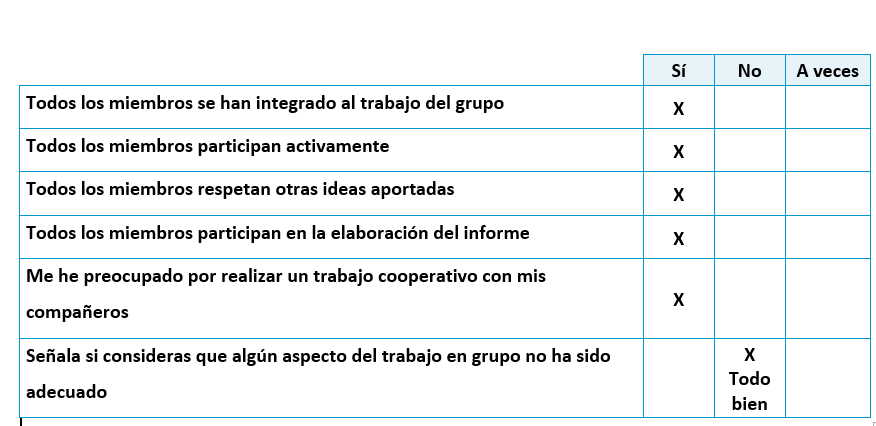

In [0]:
Image('Captura.PNG')

* Bibliografía referenciada: 
  * [1] Moya, L. G., Porrata, C. A. P. y Miyares, C. L. R. (2008). No title. Un Etiquetador Morfológico Para El Espanol De Cuba,